In [1]:
import pandas as pd
import numpy as np
import datetime
import json
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colrs
import seaborn as sns
import statsmodels.api as sm


plt.style.use("fivethirtyeight")
plt.rcParams["font.size"] = 18
pd.set_option("display.max_columns", None)
# pd.set_option('display.max_rows',None)

## Constants

In [2]:
city_dims = {
    "Bordeaux": (334, 342),
    "Clermont-Ferrand": (208, 268),
    "Dijon": (195, 234),
    "Grenoble": (409, 251),
    "Lille": (330, 342),
    "Lyon": (426, 287),
    "Mans": (228, 246),
    "Marseille": (211, 210),
    "Metz": (226, 269),
    "Montpellier": (334, 327),
    "Nancy": (151, 165),
    "Nantes": (277, 425),
    "Nice": (150, 214),
    "Orleans": (282, 256),
    "Paris": (409, 346),
    "Rennes": (423, 370),
    "Saint-Etienne": (305, 501),
    "Strasbourg": (296, 258),
    "Toulouse": (280, 347),
    "Tours": (251, 270),
}

## Loading Data
Loading a week worth of Youtube DN traffic data from 16th of March to the 22rd of March.

In [3]:
# Constants
city_str = "Lille"
app_str = "Youtube"

df_list = []
for i in range(16, 23):
    day_str = f"201903{i}"

    # downlink traffic file
    traffic_file_dn = f"/home/abdelrahman/Linux_Code/Python/Data_analysis_course/Time series project/YouTube/201903{i}/Lille_YouTube_201903{i}_DL.txt"

    # let's make a list of 15 min time intervals to use as column names
    day = datetime.datetime.strptime(day_str, "%Y%m%d")
    times = [day + datetime.timedelta(minutes=15 * j) for j in range(96)]
    times_str = [t.strftime("%Y-%d-%m (%H:%M)") for t in times]
    # column names
    columns = ["tile_id"] + times_str

    # let's load the data of the downlink traffic
    df_traffic_dn = pd.read_csv(traffic_file_dn, sep=" ", names=columns)
    df_list.append(df_traffic_dn)

# virtical concatination
df_week = pd.concat(df_list, axis=1)
# drop duplicate columns
df_week = df_week.loc[:, ~df_week.columns.duplicated()]

Loading a week worth of Youtube DN traffic data from 23rd of March to the 29th of March.

In [4]:
# Constants
city_str = "Lille"
app_str = "Youtube"

df_list = []
for i in range(23, 30):
    day_str = f"201903{i}"

    # downlink traffic file
    traffic_file_dn = f"/home/abdelrahman/Linux_Code/Python/Data_analysis_course/Time series project/YouTube/201903{i}/Lille_YouTube_201903{i}_DL.txt"

    # let's make a list of 15 min time intervals to use as column names
    day = datetime.datetime.strptime(day_str, "%Y%m%d")
    times = [day + datetime.timedelta(minutes=15 * j) for j in range(96)]
    times_str = [t.strftime("%Y-%d-%m (%H:%M)") for t in times]
    # column names
    columns = ["tile_id"] + times_str

    # let's load the data of the downlink traffic
    df_traffic_dn = pd.read_csv(traffic_file_dn, sep=" ", names=columns)
    df_list.append(df_traffic_dn)

# virtical concatination
df_next_week = pd.concat(df_list, axis=1)
# drop duplicate columns
df_next_week = df_next_week.loc[:, ~df_next_week.columns.duplicated()]

In [5]:
df_week.shape

(67750, 673)

In [6]:
df_next_week.shape

(67750, 673)

In [7]:
df_week.head()

,tile_id,2019-16-03 (00:00),2019-16-03 (00:15),2019-16-03 (00:30),2019-16-03 (00:45),2019-16-03 (01:00),2019-16-03 (01:15),2019-16-03 (01:30),2019-16-03 (01:45),2019-16-03 (02:00),2019-16-03 (02:15),2019-16-03 (02:30),2019-16-03 (02:45),2019-16-03 (03:00),2019-16-03 (03:15),2019-16-03 (03:30),2019-16-03 (03:45),2019-16-03 (04:00),2019-16-03 (04:15),2019-16-03 (04:30),2019-16-03 (04:45),2019-16-03 (05:00),2019-16-03 (05:15),2019-16-03 (05:30),2019-16-03 (05:45),2019-16-03 (06:00),2019-16-03 (06:15),2019-16-03 (06:30),2019-16-03 (06:45),2019-16-03 (07:00),2019-16-03 (07:15),2019-16-03 (07:30),2019-16-03 (07:45),2019-16-03 (08:00),2019-16-03 (08:15),2019-16-03 (08:30),2019-16-03 (08:45),2019-16-03 (09:00),2019-16-03 (09:15),2019-16-03 (09:30),2019-16-03 (09:45),2019-16-03 (10:00),2019-16-03 (10:15),2019-16-03 (10:30),2019-16-03 (10:45),2019-16-03 (11:00),2019-16-03 (11:15),2019-16-03 (11:30),2019-16-03 (11:45),2019-16-03 (12:00),2019-16-03 (12:15),2019-16-03 (12:30),2019-16-03 (12:45),2019-16-03 (13:00),2019-16-03 (13:15),2019-16-03 (13:30),2019-16-03 (13:45),2019-16-03 (14:00),2019-16-03 (14:15),2019-16-03 (14:30),2019-16-03 (14:45),2019-16-03 (15:00),2019-16-03 (15:15),2019-16-03 (15:30),2019-16-03 (15:45),2019-16-03 (16:00),2019-16-03 (16:15),2019-16-03 (16:30),2019-16-03 (16:45),2019-16-03 (17:00),2019-16-03 (17:15),2019-16-03 (17:30),2019-16-03 (17:45),2019-16-03 (18:00),2019-16-03 (18:15),2019-16-03 (18:30),2019-16-03 (18:45),2019-16-03 (19:00),2019-16-03 (19:15),2019-16-03 (19:30),2019-16-03 (19:45),2019-16-03 (20:00),2019-16-03 (20:15),2019-16-03 (20:30),2019-16-03 (20:45),2019-16-03 (21:00),2019-16-03 (21:15),2019-16-03 (21:30),2019-16-03 (21:45),2019-16-03 (22:00),2019-16-03 (22:15),2019-16-03 (22:30),2019-16-03 (22:45),2019-16-03 (23:00),2019-16-03 (23:15),2019-16-03 (23:30),2019-16-03 (23:45),2019-17-03 (00:00),2019-17-03 (00:15),2019-17-03 (00:30),2019-17-03 (00:45),2019-17-03 (01:00),2019-17-03 (01:15),2019-17-03 (01:30),2019-17-03 (01:45),2019-17-03 (02:00),2019-17-03 (02:15),2019-17-03 (02:30),2019-17-03 (02:45),2019-17-03 (03:00),2019-17-03 (03:15),2019-17-03 (03:30),2019-17-03 (03:45),2019-17-03 (04:00),2019-17-03 (04:15),2019-17-03 (04:30),2019-17-03 (04:45),2019-17-03 (05:00),2019-17-03 (05:15),2019-17-03 (05:30),2019-17-03 (05:45),2019-17-03 (06:00),2019-17-03 (06:15),2019-17-03 (06:30),2019-17-03 (06:45),2019-17-03 (07:00),2019-17-03 (07:15),2019-17-03 (07:30),2019-17-03 (07:45),2019-17-03 (08:00),2019-17-03 (08:15),2019-17-03 (08:30),2019-17-03 (08:45),2019-17-03 (09:00),2019-17-03 (09:15),2019-17-03 (09:30),2019-17-03 (09:45),2019-17-03 (10:00),2019-17-03 (10:15),2019-17-03 (10:30),2019-17-03 (10:45),2019-17-03 (11:00),2019-17-03 (11:15),2019-17-03 (11:30),2019-17-03 (11:45),2019-17-03 (12:00),2019-17-03 (12:15),2019-17-03 (12:30),2019-17-03 (12:45),2019-17-03 (13:00),2019-17-03 (13:15),2019-17-03 (13:30),2019-17-03 (13:45),2019-17-03 (14:00),2019-17-03 (14:15),2019-17-03 (14:30),2019-17-03 (14:45),2019-17-03 (15:00),2019-17-03 (15:15),2019-17-03 (15:30),2019-17-03 (15:45),2019-17-03 (16:00),2019-17-03 (16:15),2019-17-03 (16:30),2019-17-03 (16:45),2019-17-03 (17:00),2019-17-03 (17:15),2019-17-03 (17:30),2019-17-03 (17:45),2019-17-03 (18:00),2019-17-03 (18:15),2019-17-03 (18:30),2019-17-03 (18:45),2019-17-03 (19:00),2019-17-03 (19:15),2019-17-03 (19:30),2019-17-03 (19:45),2019-17-03 (20:00),2019-17-03 (20:15),2019-17-03 (20:30),2019-17-03 (20:45),2019-17-03 (21:00),2019-17-03 (21:15),2019-17-03 (21:30),2019-17-03 (21:45),2019-17-03 (22:00),2019-17-03 (22:15),2019-17-03 (22:30),2019-17-03 (22:45),2019-17-03 (23:00),2019-17-03 (23:15),2019-17-03 (23:30),2019-17-03 (23:45),2019-18-03 (00:00),2019-18-03 (00:15),2019-18-03 (00:30),2019-18-03 (00:45),2019-18-03 (01:00),2019-18-03 (01:15),2019-18-03 (01:30),2019-18-03 (01:45),2019-18-03 (02:00),2019-18-03 (02:15),2019-18-03 (02:30),2019-18-03 (02:45),2019-18-03 (03:00),2019-18-03 (03:15),2019-18-03 (03:30),2019-18-03 (03:45),2019-18-03 (04:00),2019-18-03 (04:15),2

In [8]:
df_next_week.head()

,tile_id,2019-23-03 (00:00),2019-23-03 (00:15),2019-23-03 (00:30),2019-23-03 (00:45),2019-23-03 (01:00),2019-23-03 (01:15),2019-23-03 (01:30),2019-23-03 (01:45),2019-23-03 (02:00),2019-23-03 (02:15),2019-23-03 (02:30),2019-23-03 (02:45),2019-23-03 (03:00),2019-23-03 (03:15),2019-23-03 (03:30),2019-23-03 (03:45),2019-23-03 (04:00),2019-23-03 (04:15),2019-23-03 (04:30),2019-23-03 (04:45),2019-23-03 (05:00),2019-23-03 (05:15),2019-23-03 (05:30),2019-23-03 (05:45),2019-23-03 (06:00),2019-23-03 (06:15),2019-23-03 (06:30),2019-23-03 (06:45),2019-23-03 (07:00),2019-23-03 (07:15),2019-23-03 (07:30),2019-23-03 (07:45),2019-23-03 (08:00),2019-23-03 (08:15),2019-23-03 (08:30),2019-23-03 (08:45),2019-23-03 (09:00),2019-23-03 (09:15),2019-23-03 (09:30),2019-23-03 (09:45),2019-23-03 (10:00),2019-23-03 (10:15),2019-23-03 (10:30),2019-23-03 (10:45),2019-23-03 (11:00),2019-23-03 (11:15),2019-23-03 (11:30),2019-23-03 (11:45),2019-23-03 (12:00),2019-23-03 (12:15),2019-23-03 (12:30),2019-23-03 (12:45),2019-23-03 (13:00),2019-23-03 (13:15),2019-23-03 (13:30),2019-23-03 (13:45),2019-23-03 (14:00),2019-23-03 (14:15),2019-23-03 (14:30),2019-23-03 (14:45),2019-23-03 (15:00),2019-23-03 (15:15),2019-23-03 (15:30),2019-23-03 (15:45),2019-23-03 (16:00),2019-23-03 (16:15),2019-23-03 (16:30),2019-23-03 (16:45),2019-23-03 (17:00),2019-23-03 (17:15),2019-23-03 (17:30),2019-23-03 (17:45),2019-23-03 (18:00),2019-23-03 (18:15),2019-23-03 (18:30),2019-23-03 (18:45),2019-23-03 (19:00),2019-23-03 (19:15),2019-23-03 (19:30),2019-23-03 (19:45),2019-23-03 (20:00),2019-23-03 (20:15),2019-23-03 (20:30),2019-23-03 (20:45),2019-23-03 (21:00),2019-23-03 (21:15),2019-23-03 (21:30),2019-23-03 (21:45),2019-23-03 (22:00),2019-23-03 (22:15),2019-23-03 (22:30),2019-23-03 (22:45),2019-23-03 (23:00),2019-23-03 (23:15),2019-23-03 (23:30),2019-23-03 (23:45),2019-24-03 (00:00),2019-24-03 (00:15),2019-24-03 (00:30),2019-24-03 (00:45),2019-24-03 (01:00),2019-24-03 (01:15),2019-24-03 (01:30),2019-24-03 (01:45),2019-24-03 (02:00),2019-24-03 (02:15),2019-24-03 (02:30),2019-24-03 (02:45),2019-24-03 (03:00),2019-24-03 (03:15),2019-24-03 (03:30),2019-24-03 (03:45),2019-24-03 (04:00),2019-24-03 (04:15),2019-24-03 (04:30),2019-24-03 (04:45),2019-24-03 (05:00),2019-24-03 (05:15),2019-24-03 (05:30),2019-24-03 (05:45),2019-24-03 (06:00),2019-24-03 (06:15),2019-24-03 (06:30),2019-24-03 (06:45),2019-24-03 (07:00),2019-24-03 (07:15),2019-24-03 (07:30),2019-24-03 (07:45),2019-24-03 (08:00),2019-24-03 (08:15),2019-24-03 (08:30),2019-24-03 (08:45),2019-24-03 (09:00),2019-24-03 (09:15),2019-24-03 (09:30),2019-24-03 (09:45),2019-24-03 (10:00),2019-24-03 (10:15),2019-24-03 (10:30),2019-24-03 (10:45),2019-24-03 (11:00),2019-24-03 (11:15),2019-24-03 (11:30),2019-24-03 (11:45),2019-24-03 (12:00),2019-24-03 (12:15),2019-24-03 (12:30),2019-24-03 (12:45),2019-24-03 (13:00),2019-24-03 (13:15),2019-24-03 (13:30),2019-24-03 (13:45),2019-24-03 (14:00),2019-24-03 (14:15),2019-24-03 (14:30),2019-24-03 (14:45),2019-24-03 (15:00),2019-24-03 (15:15),2019-24-03 (15:30),2019-24-03 (15:45),2019-24-03 (16:00),2019-24-03 (16:15),2019-24-03 (16:30),2019-24-03 (16:45),2019-24-03 (17:00),2019-24-03 (17:15),2019-24-03 (17:30),2019-24-03 (17:45),2019-24-03 (18:00),2019-24-03 (18:15),2019-24-03 (18:30),2019-24-03 (18:45),2019-24-03 (19:00),2019-24-03 (19:15),2019-24-03 (19:30),2019-24-03 (19:45),2019-24-03 (20:00),2019-24-03 (20:15),2019-24-03 (20:30),2019-24-03 (20:45),2019-24-03 (21:00),2019-24-03 (21:15),2019-24-03 (21:30),2019-24-03 (21:45),2019-24-03 (22:00),2019-24-03 (22:15),2019-24-03 (22:30),2019-24-03 (22:45),2019-24-03 (23:00),2019-24-03 (23:15),2019-24-03 (23:30),2019-24-03 (23:45),2019-25-03 (00:00),2019-25-03 (00:15),2019-25-03 (00:30),2019-25-03 (00:45),2019-25-03 (01:00),2019-25-03 (01:15),2019-25-03 (01:30),2019-25-03 (01:45),2019-25-03 (02:00),2019-25-03 (02:15),2019-25-03 (02:30),2019-25-03 (02:45),2019-25-03 (03:00),2019-25-03 (03:15),2019-25-03 (03:30),2019-25-03 (03:45),2019-25-03 (04:00),2019-25-03 (04:15),2

# Preprocessing

### Avoiding tiles outside the city
To make sure we only include traffic data of the city we need to avoid (drop) tiles outside the city.

In [9]:
# let's load the geojson file of the city
city_geojson_file = "/home/abdelrahman/Linux_Code/Python/Data_analysis_course/Time series project/YouTube/Lille.geojson"
fd = open(city_geojson_file)
city_geojson = json.load(fd)
fd.close()

# showing one of the features
city_geojson["features"][0]

{'type': 'Feature',
 'geometry': {'type': 'Polygon',
  'coordinates': [[[2.908974128071332, 50.49957662392627],
    [2.908984359411471, 50.500473758346054],
    [2.9103909524202143, 50.5004672245894],
    [2.910380695909483, 50.499570090278574],
    [2.908974128071332, 50.49957662392627]]]},
 'properties': {'tile_id': 86}}

In [10]:
tile_id = city_geojson["features"][0]["properties"]["tile_id"]  # 86
tile_id

86

In [11]:
geojson_tiles = []

for feature in city_geojson["features"]:
    tile_id = feature["properties"]["tile_id"]
    geojson_tiles.append(tile_id)
len(geojson_tiles)

67750

In [12]:
df_week = df_week[df_week["tile_id"].isin(geojson_tiles)]
df_week.shape

(67750, 673)

all tiles are in the city

### Reformating the dataframe into 2 columns (Timestamp and Traffic)
Since we are trying to predict the future traffic of the city, only the timestamp and the correspoding total traffic is needed since we are focusing on the overall traffic of the city.

In [13]:
temp_df = df_week.drop("tile_id", axis=1).copy()
# sum row values
temp_sum = temp_df.sum(axis=0)
df_whole_city = pd.DataFrame({"Timestamp": temp_sum.index, "Traffic": temp_sum.values})
df_whole_city["Timestamp"] = pd.to_datetime(
    df_whole_city["Timestamp"], format="%Y-%d-%m (%H:%M)"
)

In [14]:
temp_df_next = df_next_week.drop("tile_id", axis=1).copy()
# sum row values
temp_sum_next = temp_df_next.sum(axis=0)
df_whole_city_next_week = pd.DataFrame(
    {"Timestamp": temp_sum_next.index, "Traffic": temp_sum_next.values}
)
df_whole_city_next_week["Timestamp"] = pd.to_datetime(
    df_whole_city_next_week["Timestamp"], format="%Y-%d-%m (%H:%M)"
)

In [15]:
df_whole_city

,Timestamp,Traffic
0,2019-03-16 00:00:00,736280336
1,2019-03-16 00:15:00,653340031
2,2019-03-16 00:30:00,701525384
3,2019-03-16 00:45:00,698616394
4,2019-03-16 01:00:00,629370146
...,...,...
667,2019-03-22 22:45:00,1223125970
668,2019-03-22 23:00:00,1300743834
669,2019-03-22 23:15:00,1178297522
670,2019-03-22 23:30:00,1120639264


In [16]:
df_whole_city_next_week

,Timestamp,Traffic
0,2019-03-23 00:00:00,734418711
1,2019-03-23 00:15:00,826977306
2,2019-03-23 00:30:00,870003160
3,2019-03-23 00:45:00,750467039
4,2019-03-23 01:00:00,676108775
...,...,...
667,2019-03-29 22:45:00,991269255
668,2019-03-29 23:00:00,1105992457
669,2019-03-29 23:15:00,962910767
670,2019-03-29 23:30:00,958201405


In [17]:
df_whole_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Timestamp  672 non-null    datetime64[ns]
 1   Traffic    672 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 10.6 KB


In [18]:
df_whole_city_next_week.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Timestamp  672 non-null    datetime64[ns]
 1   Traffic    672 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 10.6 KB


### Checking for Times with zero trafics

In [19]:
df_whole_city[df_whole_city["Traffic"] == 0]

,Timestamp,Traffic


no times with zero trafics

### Checking for NULL Values

In [20]:
df_whole_city.isna().sum()

Timestamp    0
Traffic      0
dtype: int64

### Checking for outliers

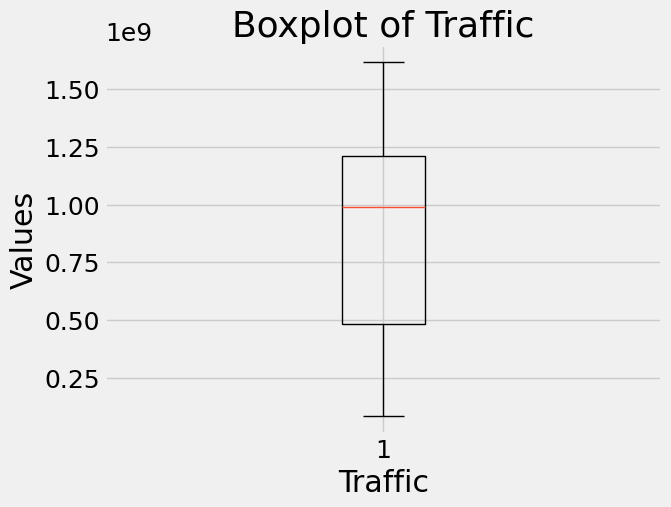

In [21]:
# Plotting the boxplot
plt.boxplot(df_whole_city["Traffic"])


plt.xlabel("Traffic")
plt.ylabel("Values")
plt.title("Boxplot of Traffic")
plt.show()

In [22]:
z_scores = np.abs(
    (df_whole_city["Traffic"] - df_whole_city["Traffic"].mean())
    / df_whole_city["Traffic"].std()
)
# Print outliers
df_whole_city[(z_scores > 2) | (z_scores < -2)]

,Timestamp,Traffic


there are no outliers in our trian dataset

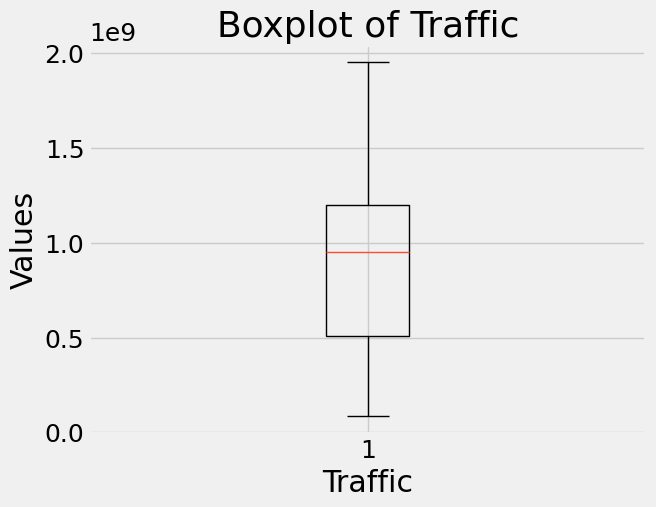

In [23]:
# Plotting the boxplot
plt.boxplot(df_whole_city_next_week["Traffic"])


plt.xlabel("Traffic")
plt.ylabel("Values")
plt.title("Boxplot of Traffic")
plt.show()

In [24]:
z_scores = np.abs(
    (df_whole_city_next_week["Traffic"] - df_whole_city_next_week["Traffic"].mean())
    / df_whole_city_next_week["Traffic"].std()
)
# Print outliers
df_whole_city_next_week[(z_scores > 2) | (z_scores < -2)]

,Timestamp,Traffic
576,2019-03-29,1951091108


there is one outlier in our dataframe so we will fill the outlier with the value of previous timestamp

In [25]:
df_whole_city_next_week[df_whole_city_next_week.index == 575]

,Timestamp,Traffic
575,2019-03-28 23:45:00,776120587


In [26]:
df_whole_city_next_week.iloc[576, 1] = 776120587
df_whole_city_next_week[df_whole_city_next_week.index == 576]

,Timestamp,Traffic
576,2019-03-29,776120587


In [27]:
print(z_scores.min())
print(z_scores.max())

0.0010305538791504636
2.6971862500750863


# EDA

In [28]:
df_whole_city.describe()

,Timestamp,Traffic
count,672,6.720000e+02
mean,2019-03-19 11:52:30,8.668423e+08
min,2019-03-16 00:00:00,8.640887e+07
25%,2019-03-17 17:56:15,4.822950e+08
50%,2019-03-19 11:52:30,9.895119e+08
75%,2019-03-21 05:48:45,1.209003e+09
max,2019-03-22 23:45:00,1.614307e+09
std,NaN,4.177868e+08


## Time Series Visualization
Here we can visualize the traffic accross the week.

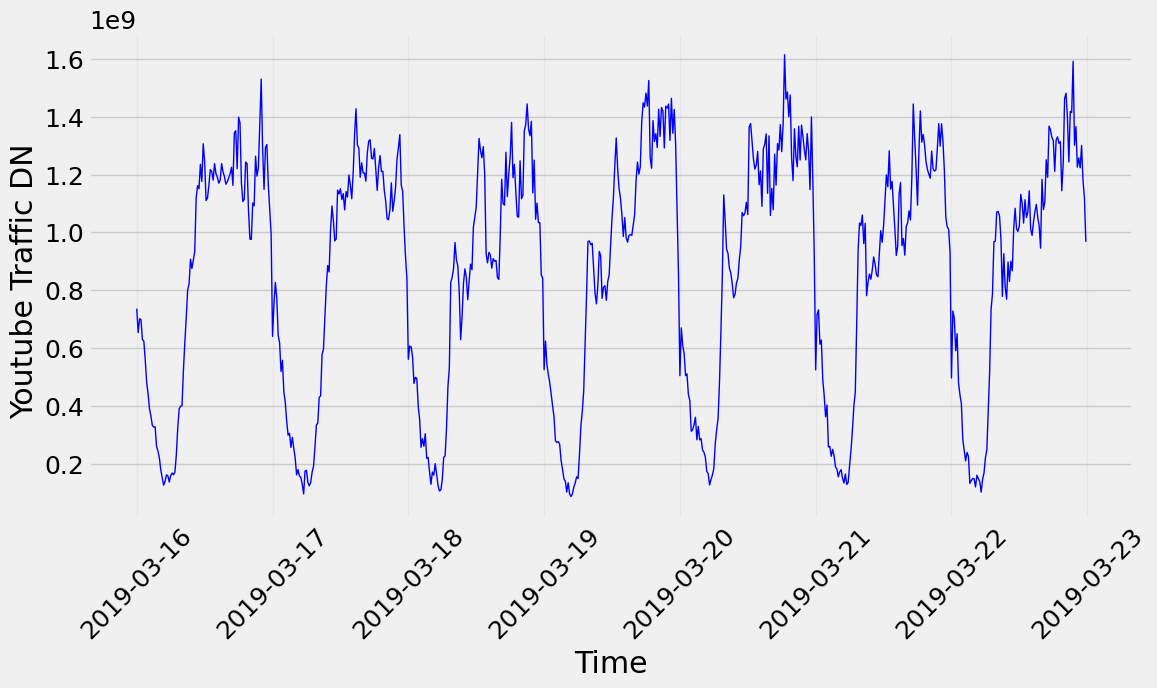

In [29]:
plt.figure(figsize=(12, 6))
plt.plot(
    df_whole_city["Timestamp"], df_whole_city["Traffic"], linewidth=1, color="blue"
)

plt.xticks(rotation=45)
plt.grid(axis="x", alpha=0.25)
plt.xlabel("Time")
plt.ylabel(f"{app_str} Traffic DN ")
plt.show()

we see a periodic traffic across the week

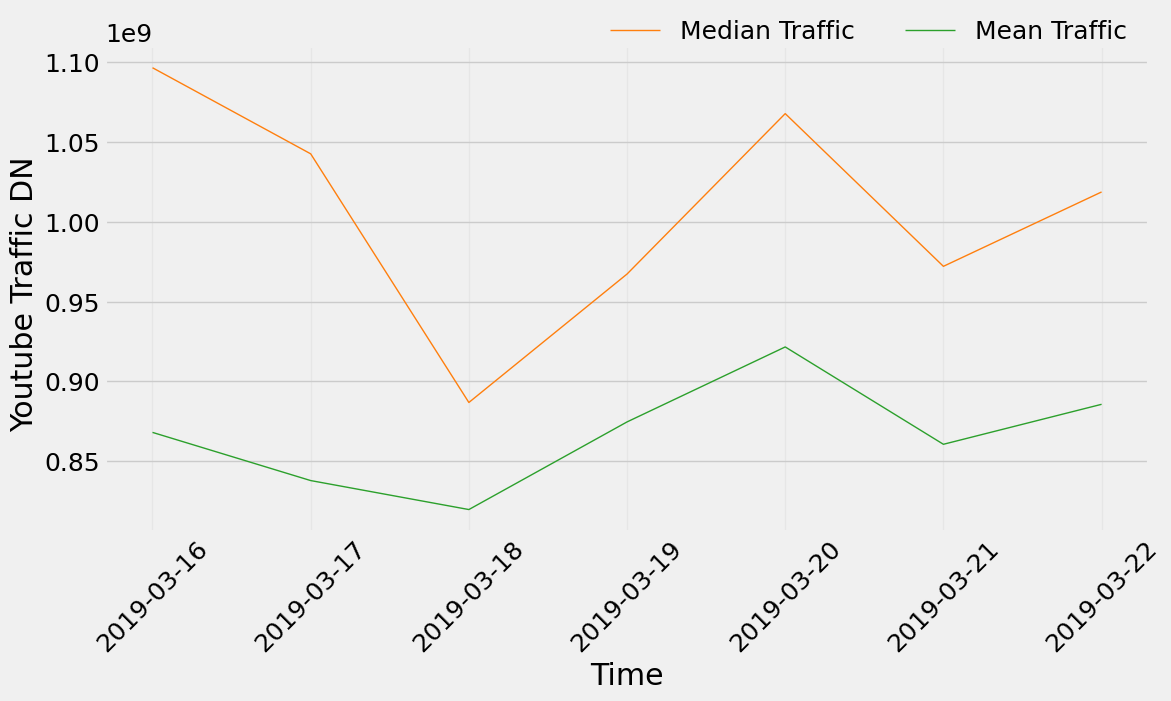

In [30]:
median_traffic = []
mean_traffic = []
df_whole_city["Timestamp_str"] = df_whole_city["Timestamp"].dt.strftime(
    "%Y-%m-%d %H:%M:%S"
)
for i in range(16, 23):
    df_day = df_whole_city[
        df_whole_city["Timestamp_str"].str.contains(
            f"2019-03-{i} \d{{2}}:\d{{2}}:\d{{2}}"
        )
    ]
    mean_traffic.append(df_day["Traffic"].mean())
    median_traffic.append(df_day["Traffic"].median())

fig = plt.figure(figsize=(12, 6))
plt.plot(
    [f"2019-03-{i}" for i in range(16, 23)],
    median_traffic,
    linewidth=1,
    color="tab:orange",
    label="Median Traffic",
)
plt.plot(
    [f"2019-03-{i}" for i in range(16, 23)],
    mean_traffic,
    linewidth=1,
    color="tab:green",
    label="Mean Traffic",
)

plt.xticks(rotation=45)
plt.grid(axis="x", alpha=0.25)
plt.xlabel("Time")
plt.ylabel(f"{app_str} Traffic DN ")
plt.legend(
    loc="upper right", ncol=3, bbox_to_anchor=(1, 1.1), fancybox=False, frameon=False
)
plt.show()

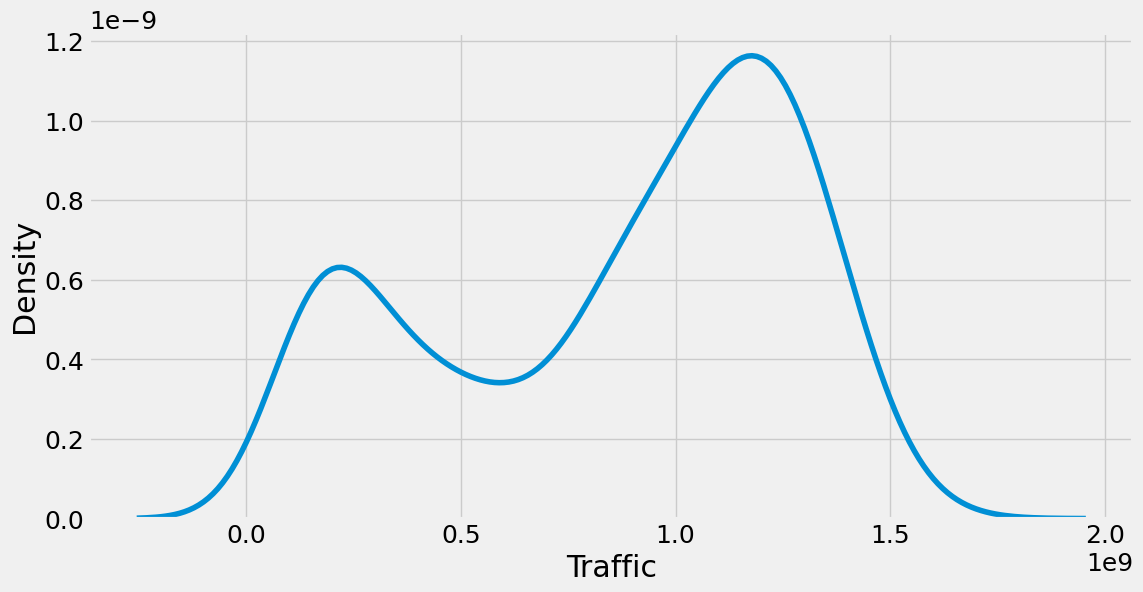

In [31]:
plt.figure(figsize=(12, 6))
sns.kdeplot(df_whole_city["Traffic"])  # type: ignore
plt.show()

The plot shows significant clustering around two values, one around 0.3 billion and another around 1.0 billion. The higher peak around 1.0 billion suggests that this traffic value is more common than the one around 0.3 billion.

In [32]:
df_whole_city["Hour"] = df_whole_city["Timestamp"].dt.hour
df_whole_city["DayofWeek"] = df_whole_city["Timestamp"].dt.dayofweek  # 0=Mon, 6=Sun
df_sorted = df_whole_city.sort_values(by="Traffic", ascending=False)
df_sorted.head(20)

,Timestamp,Traffic,Timestamp_str,Hour,DayofWeek
458,2019-03-20 18:30:00,1614306888,2019-03-20 18:30:00,18,2
662,2019-03-22 21:30:00,1591398044,2019-03-22 21:30:00,21,4
88,2019-03-16 22:00:00,1530155889,2019-03-16 22:00:00,22,5
362,2019-03-19 18:30:00,1525254419,2019-03-19 18:30:00,18,1
460,2019-03-20 19:00:00,1485154587,2019-03-20 19:00:00,19,2
360,2019-03-19 18:00:00,1481627233,2019-03-19 18:00:00,18,1
657,2019-03-22 20:15:00,1481260024,2019-03-22 20:15:00,20,4
462,2019-03-20 19:30:00,1474920935,2019-03-20 19:30:00,19,2
656,2019-03-22 20:00:00,1464084396,2019-03-22 20:00:00,20,4
378,2019-03-19 22:30:00,1463633160,2019-03-19 22:30:00,22,1


traffic increased after 5 pm (working hours) ,
we will try to prove that using graphs

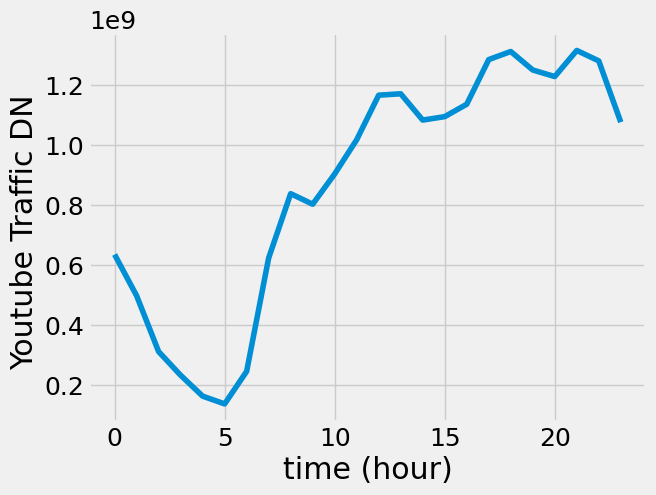

In [33]:
df_whole_city["Hour"] = df_whole_city["Timestamp"].dt.hour
hourly_traffic = df_whole_city.groupby("Hour")["Traffic"].mean()
plt.plot(hourly_traffic.index, hourly_traffic.values)
plt.xlabel("time (hour)")
plt.ylabel(f"{app_str} Traffic DN ")
plt.show()

In [34]:
df_whole_city.head()

,Timestamp,Traffic,Timestamp_str,Hour,DayofWeek
0,2019-03-16 00:00:00,736280336,2019-03-16 00:00:00,0,5
1,2019-03-16 00:15:00,653340031,2019-03-16 00:15:00,0,5
2,2019-03-16 00:30:00,701525384,2019-03-16 00:30:00,0,5
3,2019-03-16 00:45:00,698616394,2019-03-16 00:45:00,0,5
4,2019-03-16 01:00:00,629370146,2019-03-16 01:00:00,1,5


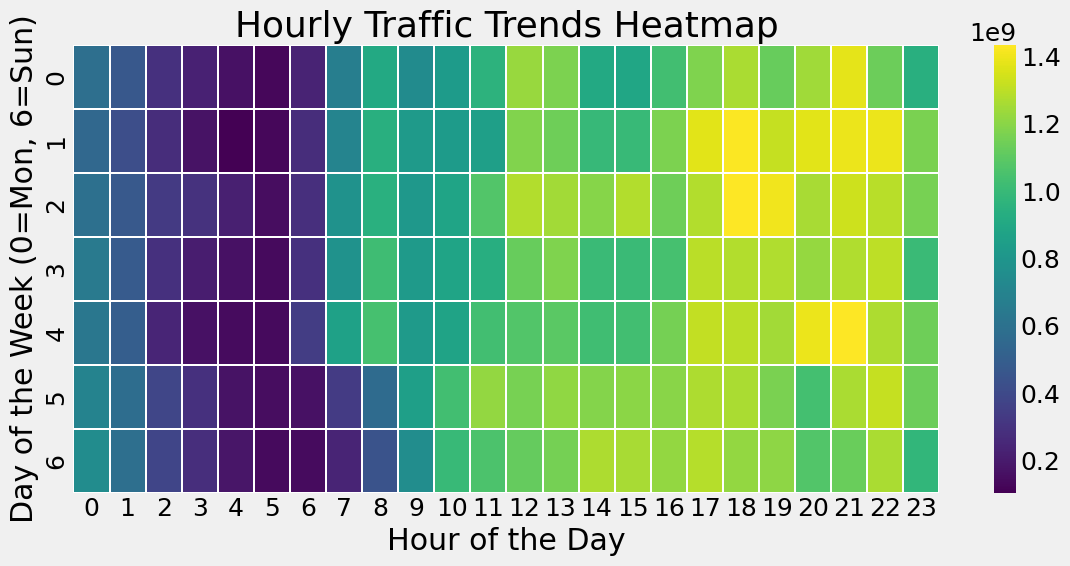

In [35]:
heatmap_data = df_whole_city.pivot_table(
    values="Traffic", index="DayofWeek", columns="Hour", aggfunc="mean"
)
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap="viridis", annot=False, fmt=".1f", linewidths=0.1)
plt.xlabel("Hour of the Day")
plt.ylabel("Day of the Week (0=Mon, 6=Sun)")
plt.title("Hourly Traffic Trends Heatmap")
plt.tight_layout()
plt.show()

this graph shows that:
- in working days people start using Youtube at 7 AM
- in holidays people start using Youtube at 9 AM

In [36]:
df_whole_city.head()

,Timestamp,Traffic,Timestamp_str,Hour,DayofWeek
0,2019-03-16 00:00:00,736280336,2019-03-16 00:00:00,0,5
1,2019-03-16 00:15:00,653340031,2019-03-16 00:15:00,0,5
2,2019-03-16 00:30:00,701525384,2019-03-16 00:30:00,0,5
3,2019-03-16 00:45:00,698616394,2019-03-16 00:45:00,0,5
4,2019-03-16 01:00:00,629370146,2019-03-16 01:00:00,1,5


In general, most time series can be decomposed in three major components. The first is seasonality, which describes the periodic signal in your time series. The second component is trend, which describes whether the time series is decreasing, constant, or increasing over time. Finally, the third component is noise, which describes the unexplained variance and volatility of your time series.

we set Timestamp column as index to plot the three major components 

In [37]:
df_date_index_next_week = df_whole_city_next_week.set_index("Timestamp")
df_date_index_next_week = df_date_index_next_week.asfreq("h")
df_date_index_next_week

,Traffic
Timestamp,
2019-03-23 00:00:00,734418711
2019-03-23 01:00:00,676108775
2019-03-23 02:00:00,379341641
2019-03-23 03:00:00,319166164
2019-03-23 04:00:00,192048229
...,...
2019-03-29 19:00:00,1292330445
2019-03-29 20:00:00,1211584768
2019-03-29 21:00:00,1308786441


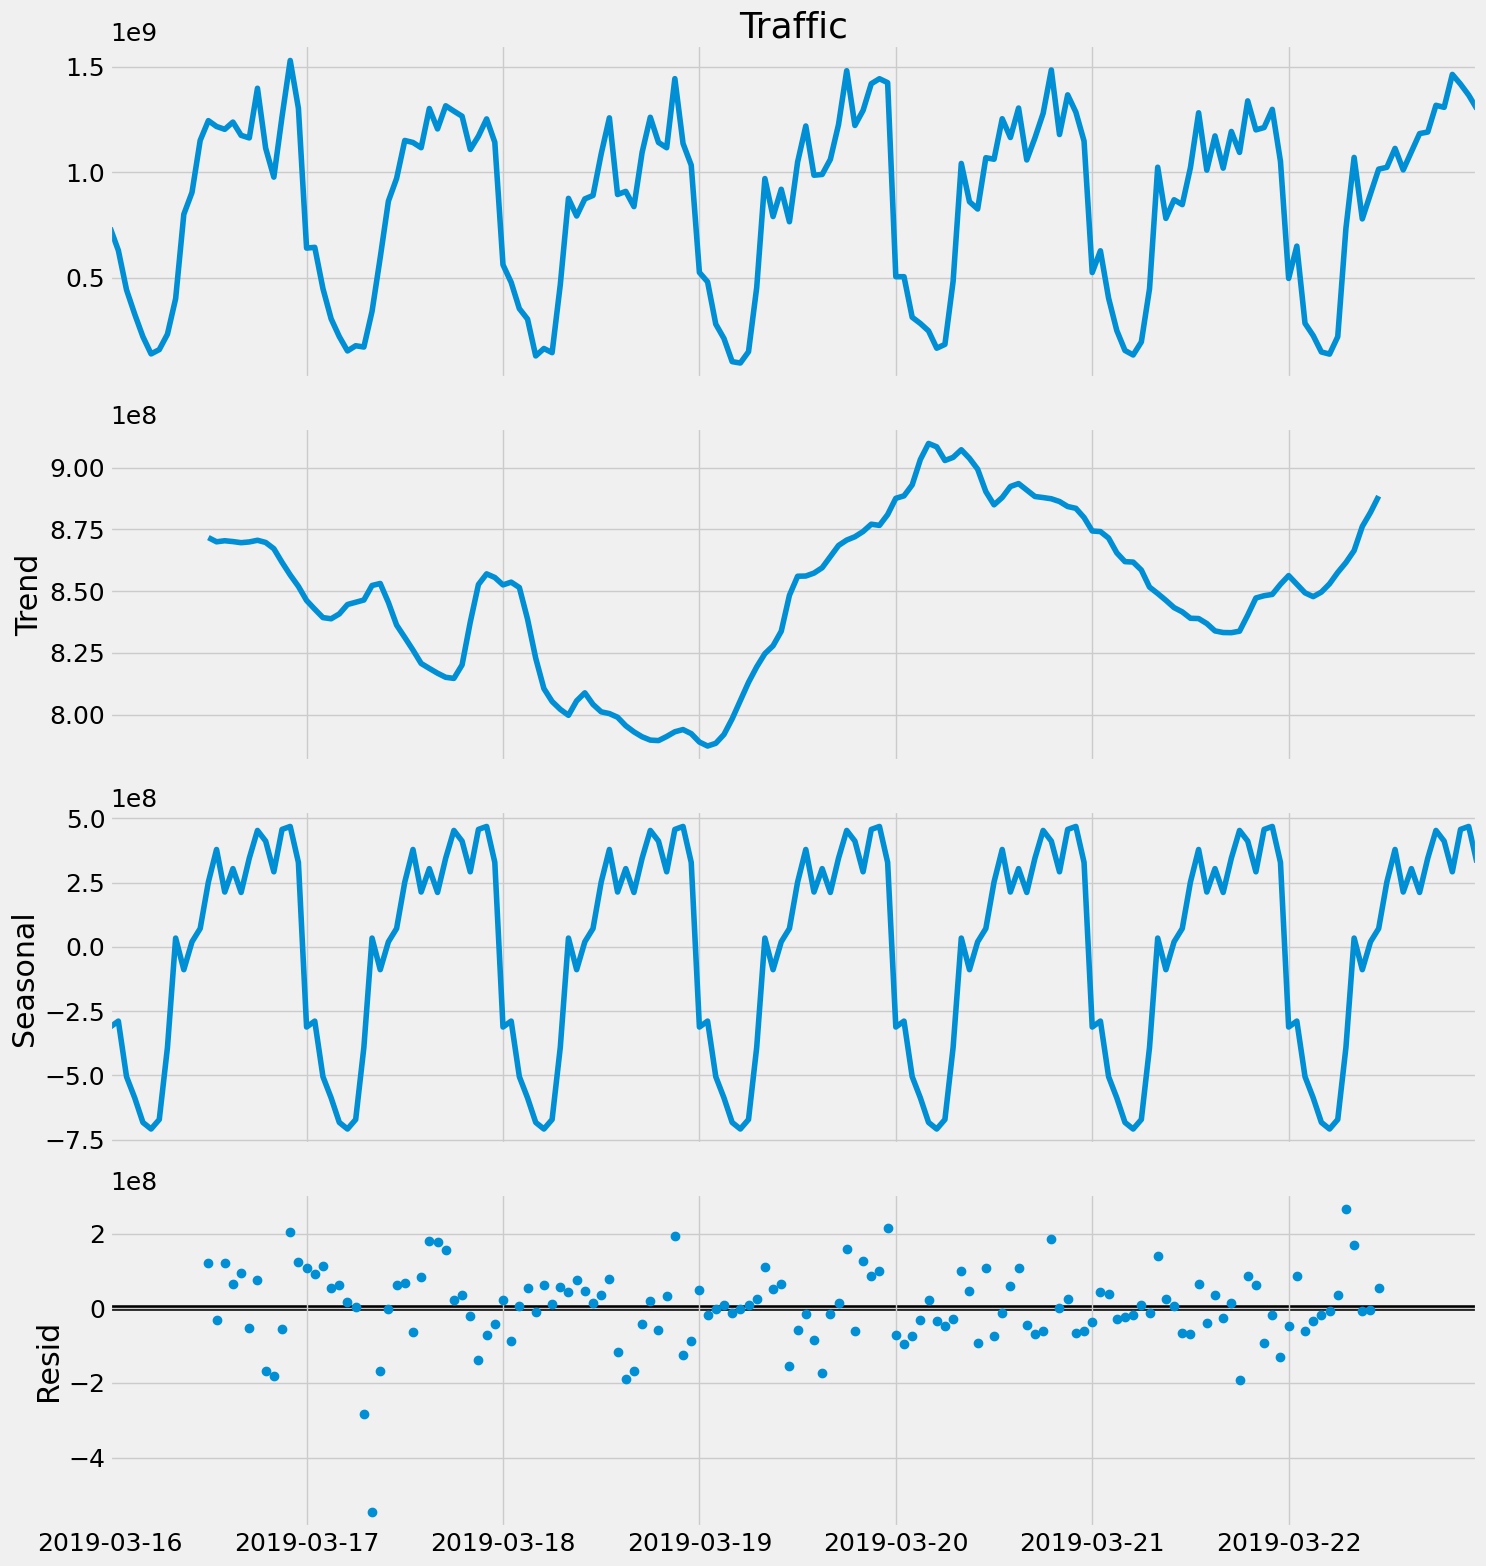

In [38]:
# Time series decomposition
from matplotlib import rcParams


rcParams["figure.figsize"] = 15, 16  # resizing the image to be big enough for us
df_date_index = df_whole_city.set_index("Timestamp")
df_date_index = df_date_index.asfreq("h")

decomposition = sm.tsa.seasonal_decompose(df_date_index["Traffic"])
fig = decomposition.plot()
plt.show()

## Seasonality component in time series

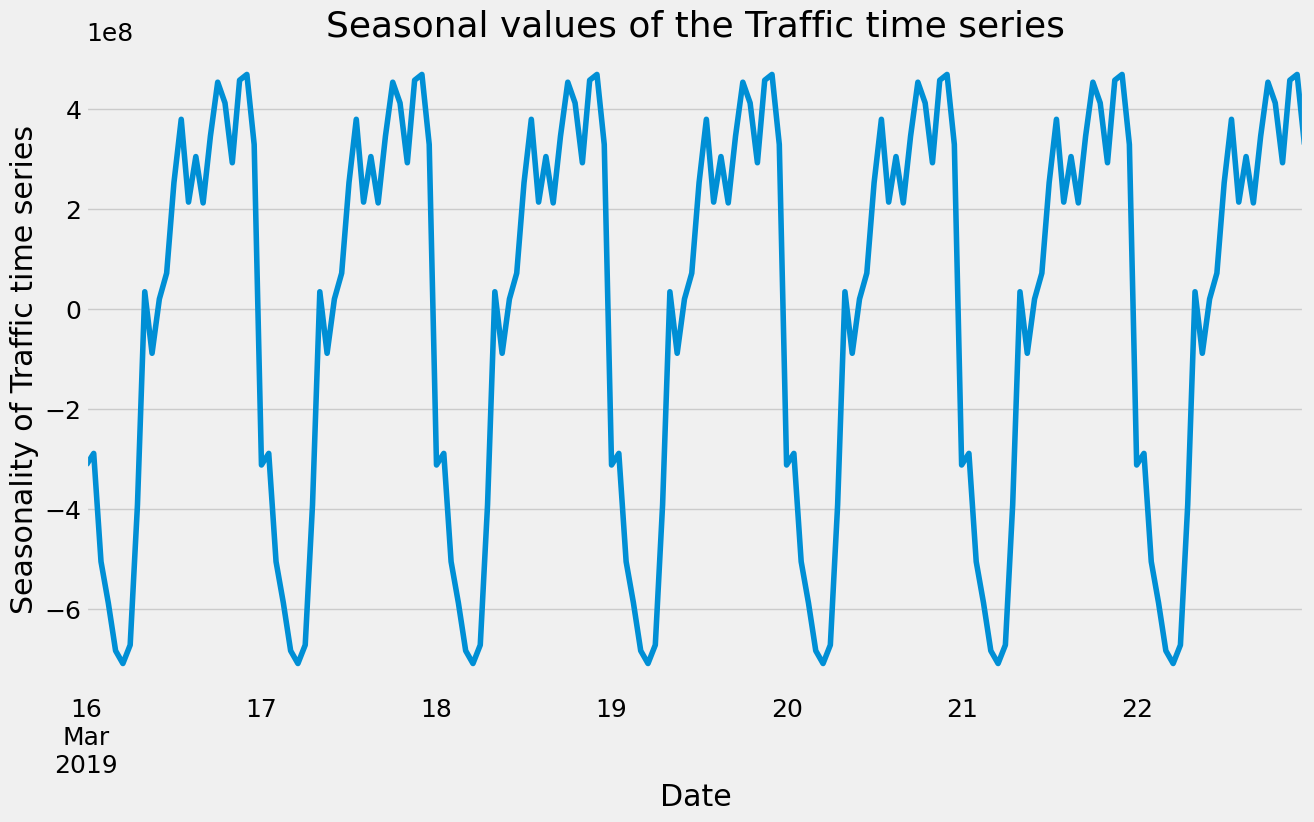

In [39]:
decomp_seasonal = decomposition.seasonal
ax = decomp_seasonal.plot(figsize=(14, 8))
ax.set_xlabel("Date")
ax.set_ylabel("Seasonality of Traffic time series")
ax.set_title("Seasonal values of the Traffic time series")
plt.show()

A daily seasonal pattern exists because the time series is influenced by seasonal factors like working hours and sleeping hours

## Trend component in time series

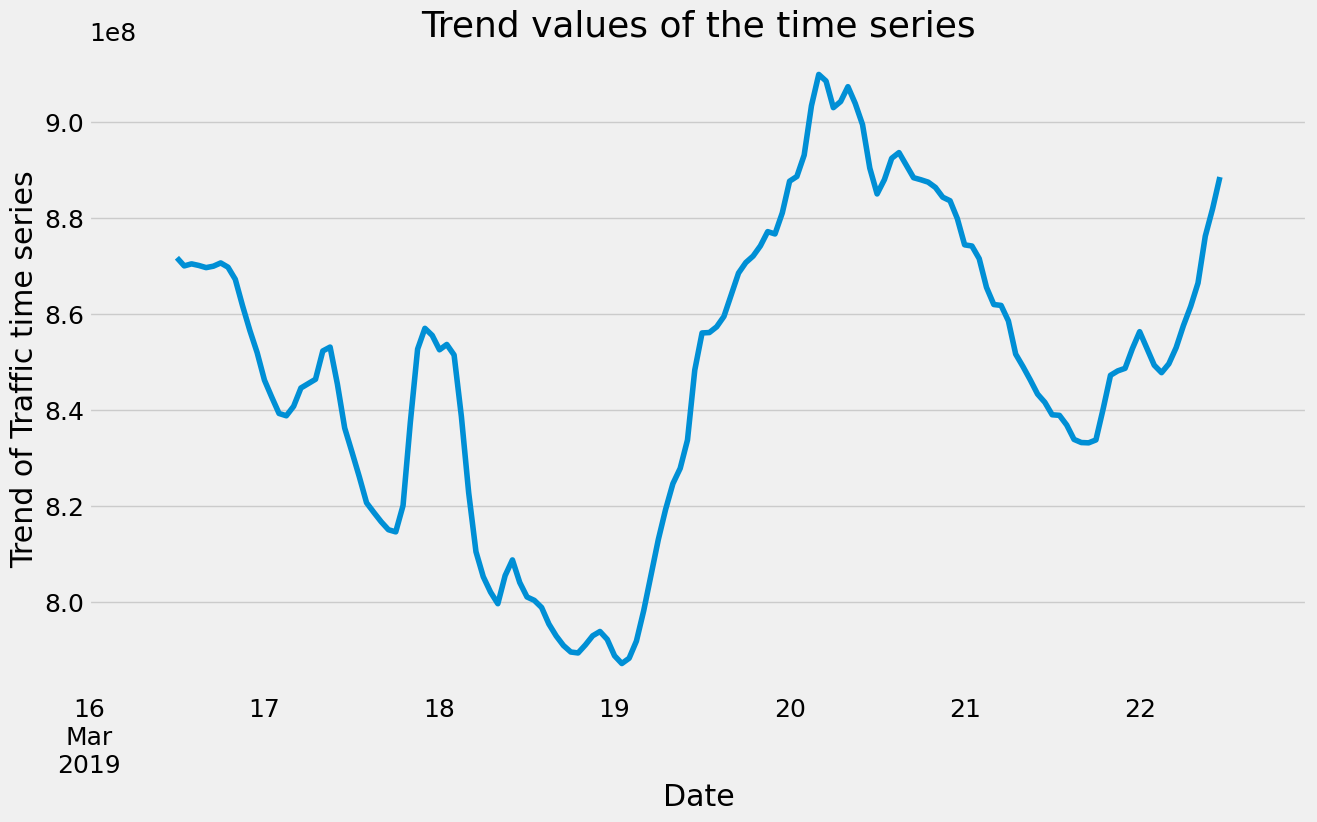

In [40]:
decomp_trend = decomposition.trend
ax = decomp_trend.plot(figsize=(14, 8))
ax.set_xlabel("Date")
ax.set_ylabel("Trend of Traffic time series")
ax.set_title("Trend values of the time series")
plt.show()

we see that traffic is increasing a lot in "20 march" may be due to special event

## Noise component in time series

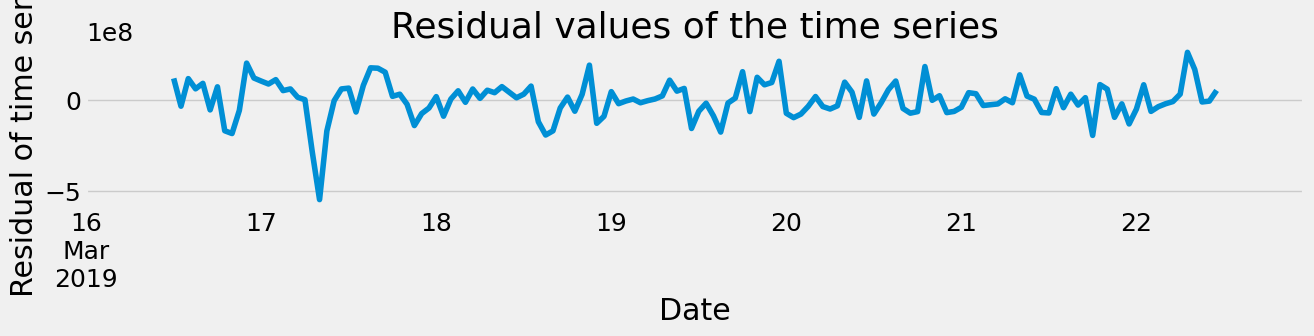

In [41]:
decomp_resid = decomposition.resid
ax = decomp_resid.plot(figsize=(14, 2))
ax.set_xlabel("Date")
ax.set_ylabel("Residual of time series")
ax.set_title("Residual values of the time series")
plt.show()

The residual component describes random, irregular influences that could not be attributed to either trend or seasonality.
- we only see irregular influences in "17 march"

# ARIMA model building

## spliting the data into training and testing

In [42]:
df_test = df_date_index_next_week
df_test

,Traffic
Timestamp,
2019-03-23 00:00:00,734418711
2019-03-23 01:00:00,676108775
2019-03-23 02:00:00,379341641
2019-03-23 03:00:00,319166164
2019-03-23 04:00:00,192048229
...,...
2019-03-29 19:00:00,1292330445
2019-03-29 20:00:00,1211584768
2019-03-29 21:00:00,1308786441


In [43]:
df_train = df_date_index[["Traffic"]]
df_train

,Traffic
Timestamp,
2019-03-16 00:00:00,736280336
2019-03-16 01:00:00,629370146
2019-03-16 02:00:00,442270840
2019-03-16 03:00:00,326813516
2019-03-16 04:00:00,220140924
...,...
2019-03-22 19:00:00,1307838840
2019-03-22 20:00:00,1464084396
2019-03-22 21:00:00,1418031734


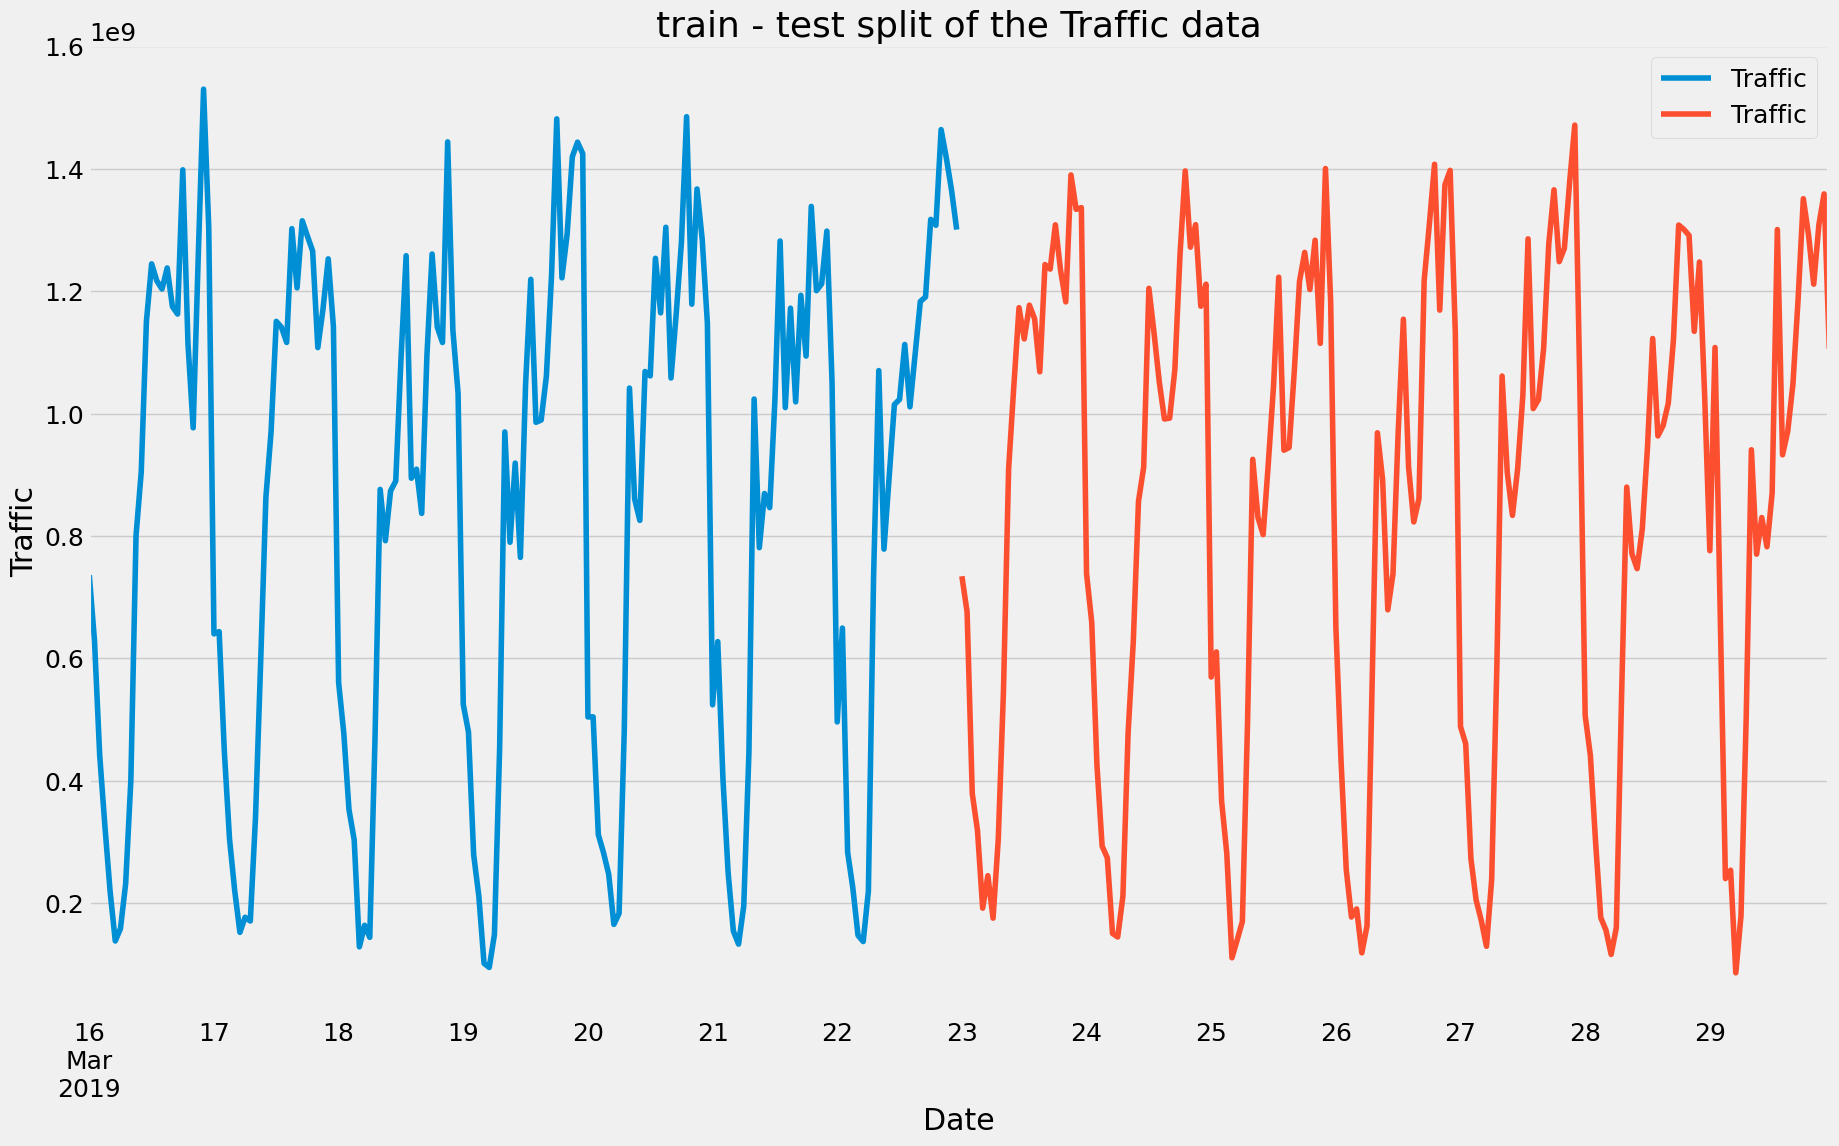

In [44]:
# Create an axis
fig, ax = plt.subplots()

# Plot the train and test sets on the axis ax
df_train.plot(ax=ax, figsize=(20, 12))
df_test.plot(ax=ax)
plt.title("train - test split of the Traffic data")
plt.xlabel("Date")
plt.ylabel("Traffic")
plt.show()

##  Making a time series stationary

There are many ways to test stationary, one of them with eyes, and others are more formal using statistical tests. There are also ways to transform non-stationary time series into stationary ones. We’ll address both of these in this subsection and then we will be ready to start modeling.

The most common test for identifying whether a time series is non-stationary is the augmented Dicky-Fuller test. This is a statistical test, where the null hypothesis is that your time series is non-stationary due to trends. We can implement the augmented Dicky-Fuller test using statsmodels. First, we import the adfuller function as shown, then we can run it on our data.

In [45]:
df_total = pd.concat([df_train, df_test], axis=0)
df_total

,Traffic
Timestamp,
2019-03-16 00:00:00,736280336
2019-03-16 01:00:00,629370146
2019-03-16 02:00:00,442270840
2019-03-16 03:00:00,326813516
2019-03-16 04:00:00,220140924
...,...
2019-03-29 19:00:00,1292330445
2019-03-29 20:00:00,1211584768
2019-03-29 21:00:00,1308786441


In [46]:
df_total.to_csv("dataset.csv")

In [47]:
from statsmodels.tsa.stattools import adfuller

results = adfuller(df_total)
print(results)

(-15.924091873954579, 7.86341643007808e-29, 15, 320, {'1%': -3.450951662384033, '5%': -2.8706147570800784, '10%': -2.571604931640625}, 12858.390796761887)


The item before the last item in the tuple is a dictionary. This stores the critical values of the test statistic which equate to different p-values. In this case, if we wanted a p-value of 0.05 (5%) or below, our test statistic needed to be below -2.87

The zeroth element is the test statistic, in this case, it is -15.924 

Based on this result, we are sure that the time series is stationary.

In [48]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import root_mean_squared_error, r2_score, mean_absolute_error  # type: ignore


model = ARIMA(df_train, order=(1, 0, 1))  # order=(p,i,q)

# Fit the ARIMA model
model_fit = model.fit()

print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                Traffic   No. Observations:                  168
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -3458.083
Date:                Mon, 27 May 2024   AIC                           6924.165
Time:                        18:52:41   BIC                           6936.661
Sample:                    03-16-2019   HQIC                          6929.236
                         - 03-22-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       8.547e+08   1.42e-11      6e+19      0.000    8.55e+08    8.55e+08
ar.L1          0.8329      0.047     17.741      0.000       0.741       0.925
ma.L1          0.1163      0.095      1.227      0.2

In [49]:
# Evaluate the model
r2_score_train = r2_score(df_train, model_fit.fittedvalues)
print(f"The Training r2: {r2_score_train} ")
RMS_train = root_mean_squared_error(df_train, model_fit.fittedvalues)
print(f"The Training RMS: {RMS_train} ")
MAE_train = mean_absolute_error(df_train, model_fit.fittedvalues)
print(f"The Training MAE: {MAE_train} ")

print("#" * 40)

r2_score_test = r2_score(df_test, model_fit.fittedvalues)
print(f"The Testing r2: {r2_score_test} ")
RMS_test = root_mean_squared_error(df_test, model_fit.fittedvalues)
print(f"The Testing RMS: {RMS_test} ")
MAE_test = mean_absolute_error(df_test, model_fit.fittedvalues)
print(f"The Testing MAE: {MAE_test} ")

The Training r2: 0.7492399313941549 
The Training RMS: 209752696.6691782 
The Training MAE: 166484129.74059635 
########################################
The Testing r2: 0.7398597292596611 
The Testing RMS: 206157448.7817698 
The Testing MAE: 158619193.83260047 


we see that the model performance not good enough

## Using ACF and PACF to find the best model parameters

The ACF can be defined as the correlation between a time series and itself with n lags. So ACF(1) is the correlation between the time series and a one-step lagged version of itself. An ACF(2) is the correlation between the time series and a two-steps lagged version of itself and so on.

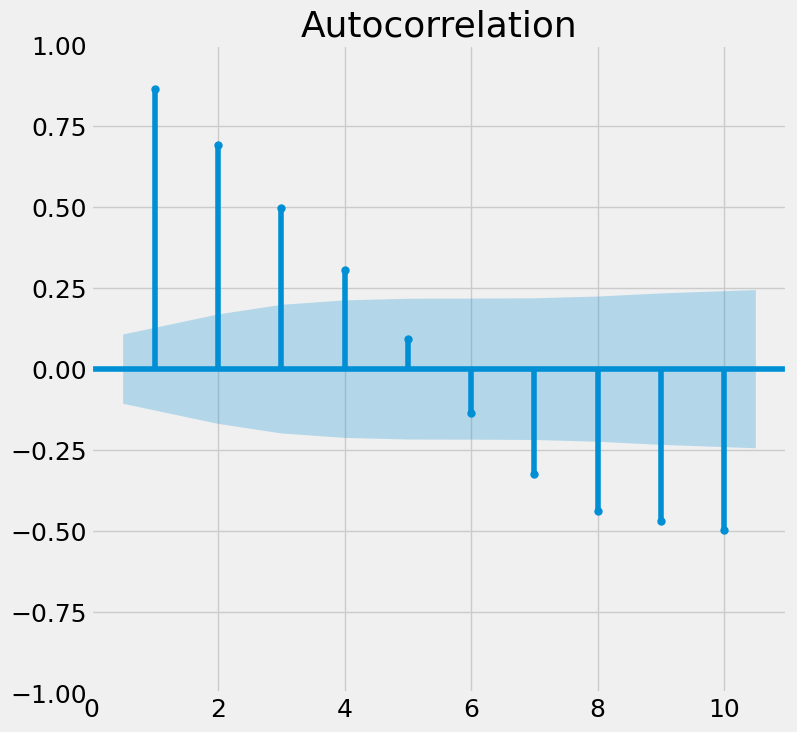

In [50]:
# Auto correlation
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Make ACF plot
rcParams["figure.figsize"] = 8, 8
plot_acf(df_total, lags=10, zero=False)
plt.show()

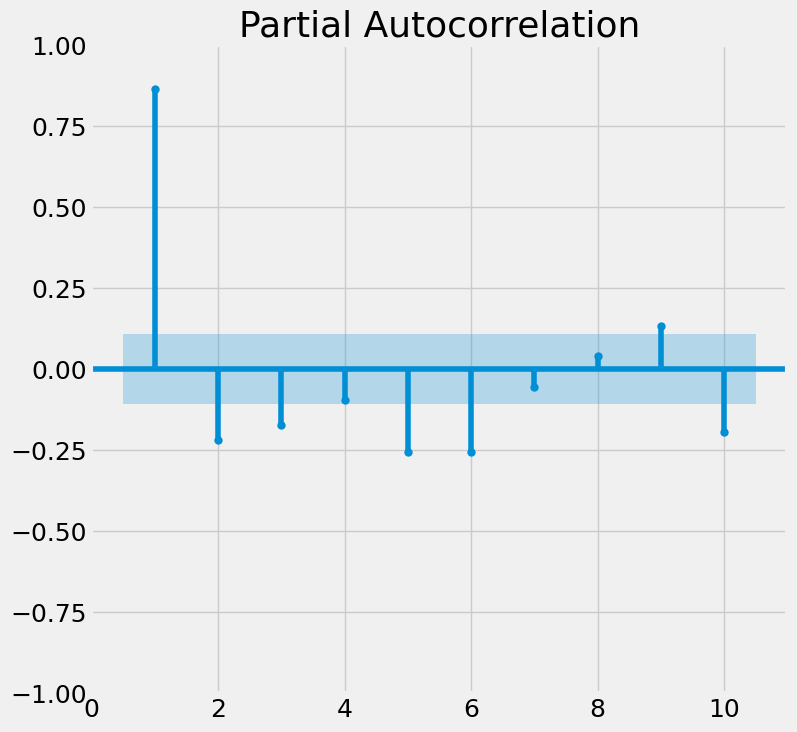

In [51]:
# Make PACF plot
plot_pacf(df_total, lags=10, zero=False)
plt.show()

ARIMA(p, d, q) model: If both the ACF and PACF plots show a gradual decay, an ARIMA model is usually a better choice. The 'd' parameter refers to the order of differencing required to make the time series stationary. If the time series is already stationary, d=0.

In [52]:
import statsmodels.api as sm

order_aic_bic = []

# Loop over p values from 0-10
for p in range(11):
    # Loop over q values from 0-10
    for q in range(11):

        try:
            # create and fit ARMA(p,q) model
            model = ARIMA(df_train, order=(p, 0, q))
            results = model.fit()

            # Print order and results
            order_aic_bic.append((p, q, results.aic, results.bic))
        except:
            print(p, q, None, None)

# Make DataFrame of model order and AIC/BIC scores
order_df = pd.DataFrame(order_aic_bic, columns=["p", "q", "aic", "bic"])

/home/abdelrahman/miniconda3/envs/py311/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/abdelrahman/miniconda3/envs/py311/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/abdelrahman/miniconda3/envs/py311/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/abdelrahman/miniconda3/envs/py311/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as s

In [53]:
# Sort by AIC
print("Sorted by AIC ")
print("\n")
print(order_df.sort_values("aic").reset_index(drop=True))

# Sort by BIC
print("Sorted by BIC ")
print("\n")
print(order_df.sort_values("bic").reset_index(drop=True))

Sorted by AIC 


     p   q          aic          bic
0    5   7  6861.860992  6905.596488
1    7  10  6863.511124  6922.866440
2    4  10  6869.551318  6919.534741
3    2   9  6870.782644  6911.394176
4    3   9  6871.078756  6914.814251
..  ..  ..          ...          ...
116  0   8  7016.999572  7048.239212
117  0   9  7020.390014  7054.753617
118  0  10  7024.208306  7061.695874
119  0   1  7047.508668  7056.880559
120  0   0  7845.220516  7851.468444

[121 rows x 4 columns]
Sorted by BIC 


     p   q          aic          bic
0    5   7  6861.860992  6905.596488
1    5   3  6877.177695  6908.417335
2    3   3  6884.500565  6909.492277
3    2   1  6894.046868  6909.666688
4    4   3  6882.956932  6911.072608
..  ..  ..          ...          ...
116  0   8  7016.999572  7048.239212
117  0   9  7020.390014  7054.753617
118  0   1  7047.508668  7056.880559
119  0  10  7024.208306  7061.695874
120  0   0  7845.220516  7851.468444

[121 rows x 4 columns]


In [54]:
model = ARIMA(df_train, order=(5, 0, 7))

# Fit the ARIMA model
model_fit = model.fit()

print(model_fit.summary())

/home/abdelrahman/miniconda3/envs/py311/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                Traffic   No. Observations:                  168
Model:                 ARIMA(5, 0, 7)   Log Likelihood               -3416.930
Date:                Mon, 27 May 2024   AIC                           6861.861
Time:                        18:53:26   BIC                           6905.596
Sample:                    03-16-2019   HQIC                          6879.611
                         - 03-22-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       8.547e+08   1.87e-09   4.58e+17      0.000    8.55e+08    8.55e+08
ar.L1          2.1239      0.170     12.484      0.000       1.790       2.457
ar.L2         -0.8811      0.415     -2.125      0.0

/home/abdelrahman/miniconda3/envs/py311/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [55]:
# Evaluate the model
r2_score_train = r2_score(df_train, model_fit.fittedvalues)
print(f"The Training r2: {r2_score_train} ")
RMS_train = root_mean_squared_error(df_train, model_fit.fittedvalues)
print(f"The Training RMS: {RMS_train} ")
MAE_train = mean_absolute_error(df_train, model_fit.fittedvalues)
print(f"The Training MAE: {MAE_train} ")

print("#" * 40)

r2_score_test = r2_score(df_test, model_fit.fittedvalues)
print(f"The Testing r2: {r2_score_test} ")
RMS_test = root_mean_squared_error(df_test, model_fit.fittedvalues)
print(f"The Testing RMS: {RMS_test} ")
MAE_test = mean_absolute_error(df_test, model_fit.fittedvalues)
print(f"The Testing MAE: {MAE_test} ")

The Training r2: 0.8502112673261175 
The Training RMS: 162113034.8782567 
The Training MAE: 123526858.91938727 
########################################
The Testing r2: 0.8158864682103097 
The Testing RMS: 173435537.9395691 
The Testing MAE: 137383754.76233846 


## The model diagnostic

The next step is to diagnose the model to know whether the model is behaving well or not. To diagnose the model we will focus on the residuals of the training data. The residuals are the difference between the model’s one-step-ahead predictions and the real values of the time series.

In [56]:
# Assign residuals to variable
residuals = model_fit.resid
print(residuals)

Timestamp
2019-03-16 00:00:00   -1.184040e+08
2019-03-16 01:00:00   -1.198537e+08
2019-03-16 02:00:00   -1.967372e+08
2019-03-16 03:00:00   -1.237387e+08
2019-03-16 04:00:00   -1.238471e+08
                           ...     
2019-03-22 19:00:00    3.733101e+07
2019-03-22 20:00:00    2.591675e+08
2019-03-22 21:00:00    1.621844e+08
2019-03-22 22:00:00    1.842806e+08
2019-03-22 23:00:00    1.771858e+08
Freq: h, Length: 168, dtype: float64


In [57]:
# The mean absolute error
import numpy as np

mae = np.mean(np.abs(residuals))
print(mae)

123526858.91938727


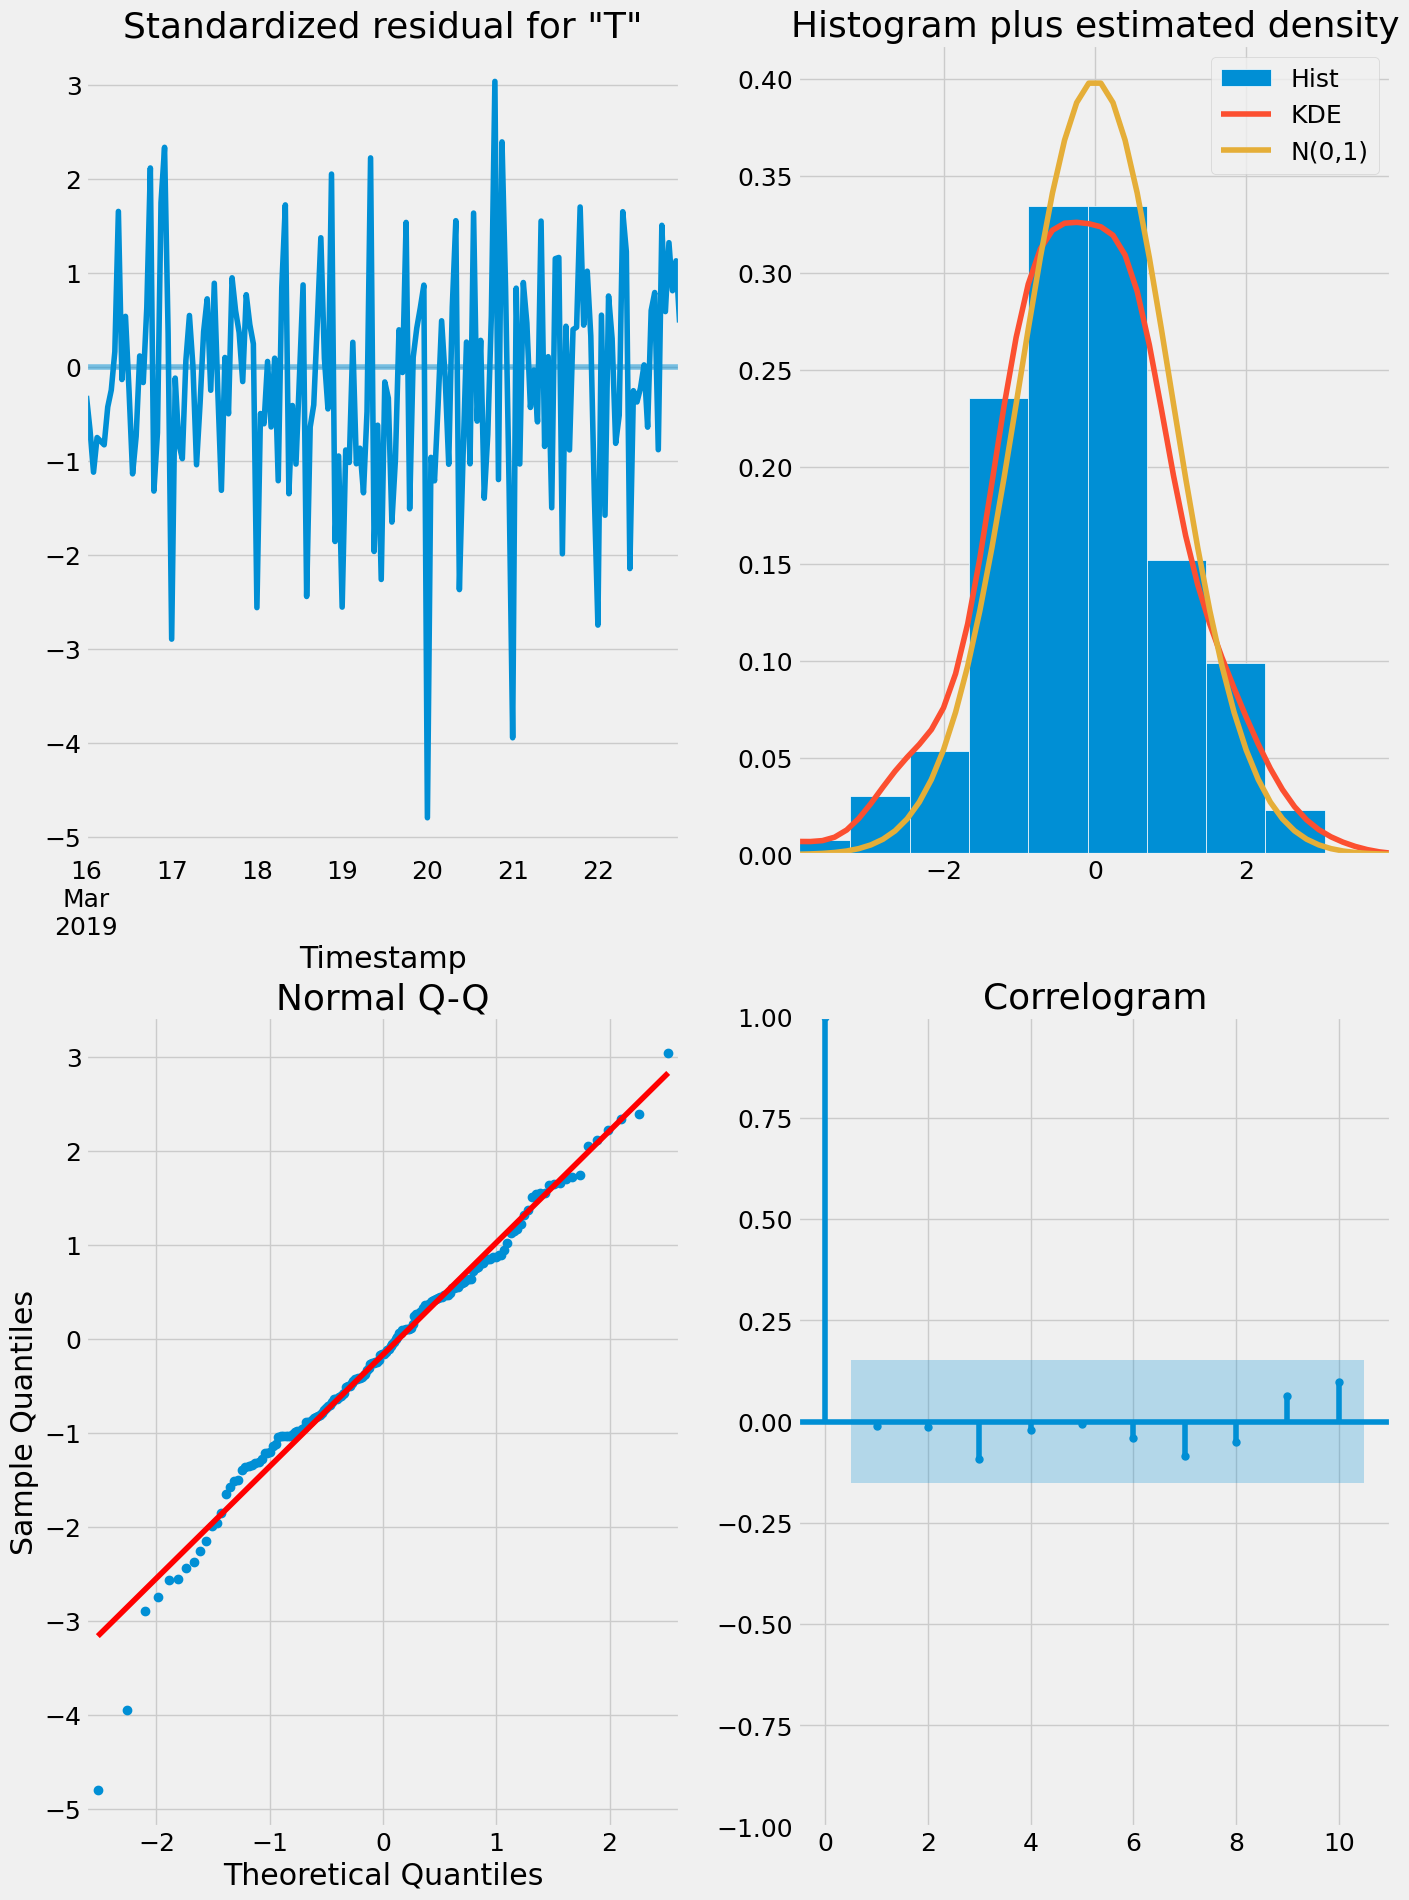

In [58]:
# Create the 4 diagostics plots
results.plot_diagnostics(figsize=(15, 22))
plt.show()

There are four plots in the residuals diagnostic plots:

Standardized residuals plot: The top left plot shows one-step-ahead standardized residuals. If our model is working correctly, there should be no obvious pattern in the residuals. This is shown here in this case.

Histogram plus estimated density plot: This plot shows the distribution of the residuals. The histogram shows us the measured distribution; the red line shows a smoothed version of this histogram, and the orange line shows a normal distribution. If the model is good these two lines should be the same. Here there are small differences between them, which indicate that our model is doing well.

Normal Q-Q plot: The Q-Q plot compare the distribution of the residuals to the normal distribution. If the distribution of the residuals is normal, then all the points should lie along the red line, except for some values at the end.

Correlogram plot: The correlogram plot is the ACF plot of the residuals rather than the data. 95% of the correlations for lag greater than zero should not be significant (within the blue shades). If there is a significant correlation in the residuals, it means that there is information in the data that was not captured by the model.

We can get the summary statistics of the model residuals using the results .summary method. In the result table shown below, the Prob(Q) is the p-value associated with the null hypothesis that the residuals have no correlation structure. Prob(JB) is the p-value associated with the null hypothesis that the residuals are Gaussian normally distributed. If either of the p-values is less than 0.05 we reject that hypothesis.

In [59]:
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                Traffic   No. Observations:                  168
Model:               ARIMA(10, 0, 10)   Log Likelihood               -3429.992
Date:                Mon, 27 May 2024   AIC                           6903.984
Time:                        18:53:26   BIC                           6972.712
Sample:                    03-16-2019   HQIC                          6931.877
                         - 03-22-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       8.547e+08   8.27e-08   1.03e+16      0.000    8.55e+08    8.55e+08
ar.L1         -0.1262      0.274     -0.460      0.645      -0.663       0.411
ar.L2          0.3703      0.120      3.084      0.0

## making prediction

In [60]:
# Use the model to make predictions
# Predict for the next hour
forecast_next_step = model_fit.forecast(steps=1)
print(
    f'The traffic for the next hour is predicted to be: {forecast_next_step[0].astype("int")}'
)

The traffic for the next hour is predicted to be: 1022130774


/tmp/ipykernel_103052/3122469822.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f'The traffic for the next hour is predicted to be: {forecast_next_step[0].astype("int")}'


In [61]:
# predict for next day (first day in our testing data)
pred = model_fit.get_forecast(steps=24)
df_pred = pd.DataFrame(pred.conf_int().astype("int"))
df_pred["mean Traffic"] = pred.predicted_mean.astype("int")
df_pred

,lower Traffic,upper Traffic,mean Traffic
2019-03-23 00:00:00,689389023,1354872525,1022130774
2019-03-23 01:00:00,441556522,1193865138,817710830
2019-03-23 02:00:00,186536143,971841747,579188945
2019-03-23 03:00:00,8655246,806779850,407717548
2019-03-23 04:00:00,-194247804,627950451,216851323
2019-03-23 05:00:00,-258992483,566802986,153905251
2019-03-23 06:00:00,-261719525,570209297,154244885
2019-03-23 07:00:00,-152951986,716985412,282016712
2019-03-23 08:00:00,-46873059,873258144,413192542
2019-03-23 09:00:00,117869668,1073699089,595784379


In [62]:
df_test_firstday = df_test.head(24)
df_test_firstday.head()

,Traffic
Timestamp,
2019-03-23 00:00:00,734418711
2019-03-23 01:00:00,676108775
2019-03-23 02:00:00,379341641
2019-03-23 03:00:00,319166164
2019-03-23 04:00:00,192048229


In [63]:
df_evaluation = df_pred
df_evaluation["actual Traffic"] = df_test_firstday["Traffic"]
df_evaluation

,lower Traffic,upper Traffic,mean Traffic,actual Traffic
2019-03-23 00:00:00,689389023,1354872525,1022130774,734418711
2019-03-23 01:00:00,441556522,1193865138,817710830,676108775
2019-03-23 02:00:00,186536143,971841747,579188945,379341641
2019-03-23 03:00:00,8655246,806779850,407717548,319166164
2019-03-23 04:00:00,-194247804,627950451,216851323,192048229
2019-03-23 05:00:00,-258992483,566802986,153905251,245204208
2019-03-23 06:00:00,-261719525,570209297,154244885,175802760
2019-03-23 07:00:00,-152951986,716985412,282016712,303917225
2019-03-23 08:00:00,-46873059,873258144,413192542,545273330
2019-03-23 09:00:00,117869668,1073699089,595784379,910473375


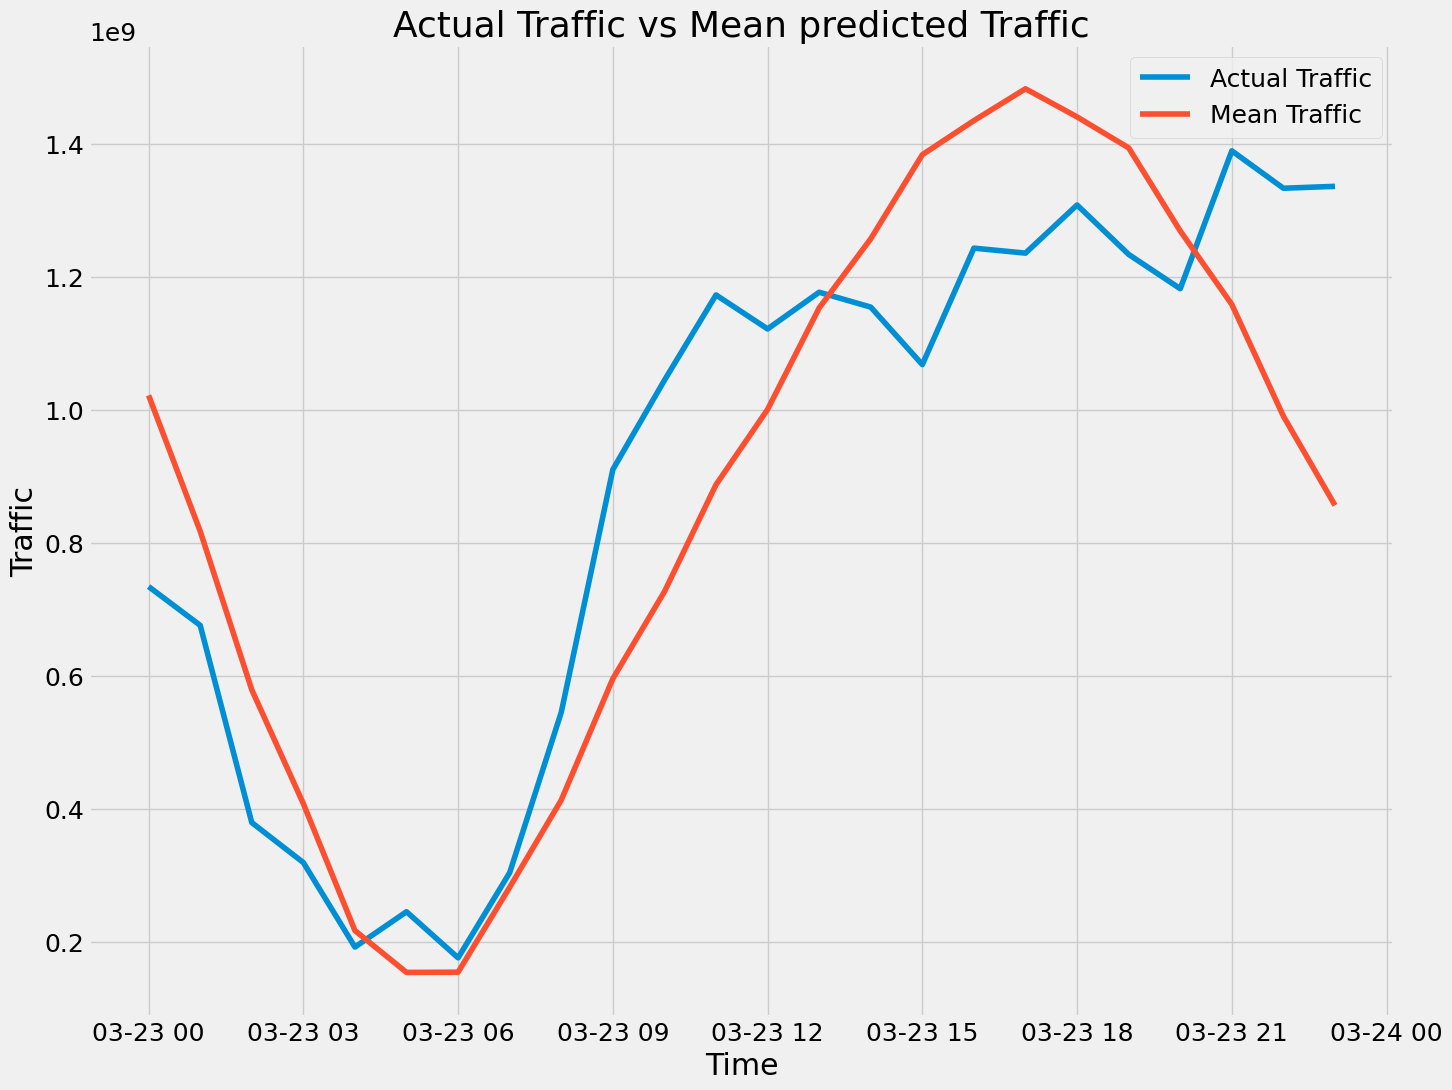

In [64]:
plt.figure(figsize=(15, 12))

# Create the line plot
plt.plot(df_evaluation["actual Traffic"], label="Actual Traffic")
plt.plot(df_evaluation["mean Traffic"], label="Mean Traffic")

plt.xlabel("Time")
plt.ylabel("Traffic")
plt.title("Actual Traffic vs Mean predicted Traffic")

plt.legend()

plt.show()

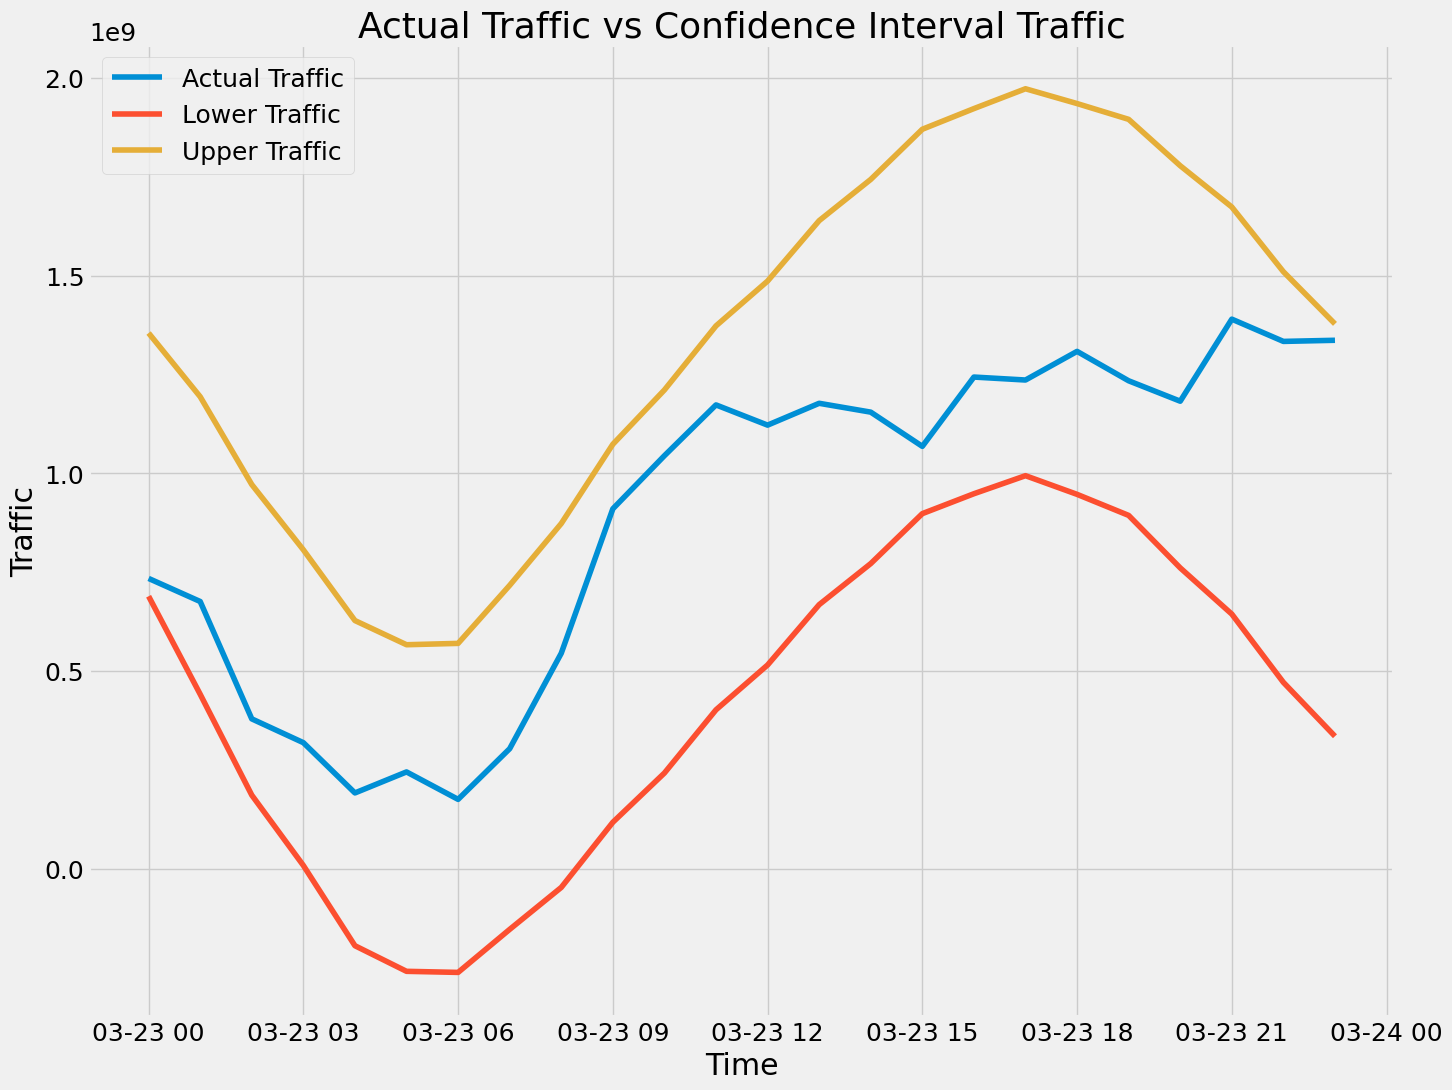

In [65]:
plt.figure(figsize=(15, 12))

# Create the line plot
plt.plot(df_evaluation["actual Traffic"], label="Actual Traffic")
plt.plot(df_evaluation["lower Traffic"], label="Lower Traffic")
plt.plot(df_evaluation["upper Traffic"], label="Upper Traffic")

plt.xlabel("Time")
plt.ylabel("Traffic")
plt.title("Actual Traffic vs Confidence Interval Traffic")

plt.legend()

plt.show()

we see that actual traffic always within the confidence interval